In [452]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
import hdbscan
from sklearn.cluster import SpectralClustering
from sklearn_extra.cluster import KMedoids


In [3]:
student_set = pd.read_csv('turkiye-student-evaluation_generic.csv')
beans_set = pd.read_excel('Dry_Bean_Dataset.xlsx')
obesity_set = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
mice_set = pd.read_excel('Data_Cortex_Nuclear.xls')
bible_set = pd.read_csv('avila-tr.csv')
frogcall_set = pd.read_csv('Frogs_MFCCs.csv')
wine_set = pd.read_csv('winequalityN.csv')


In [4]:
print(student_set.columns)
print(beans_set.columns)
print(obesity_set.columns)
print(mice_set.columns)
print(bible_set.columns)
print(frogcall_set.columns)
print(wine_set.columns)

# student_set

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'p

In [5]:
student_set=student_set.dropna()
beans_set=beans_set.dropna()
obesity_set=obesity_set.dropna()
mice_set=mice_set.dropna()
bible_set=bible_set.dropna()
frogcall_set=frogcall_set.dropna()
wine_set=wine_set.dropna()

student_set=student_set.drop(columns=['instr', 'class'])
mice_set=mice_set.drop(columns=['MouseID'])
print("executed")

executed


In [33]:
enc = LabelEncoder()
obesity_set['Gender']=enc.fit_transform(obesity_set['Gender'])
columns=['family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']
for i in columns:
    obesity_set[i]=enc.fit_transform(obesity_set[i])

enc = LabelEncoder()
columns=['Genotype','Treatment','Behavior']
for i in columns:
    mice_set[i]=enc.fit_transform(mice_set[i])

enc = LabelEncoder()
columns=['Family','Genus']  #Species is also possible
for i in columns:
    frogcall_set[i]=enc.fit_transform(frogcall_set[i])

enc = LabelEncoder()
columns=['type'] 
for i in columns:
    wine_set[i]=enc.fit_transform(wine_set[i])

beans_set['Class']= enc.fit_transform(beans_set['Class'])
obesity_set['NObeyesdad']=enc.fit_transform(obesity_set['NObeyesdad'])
mice_set['class']=enc.fit_transform(mice_set['class'])
bible_set['Class']= enc.fit_transform(bible_set['Class'])



In [7]:
scaler = StandardScaler()
beans_set.iloc[:,0:16]= scaler.fit_transform(beans_set.iloc[:,0:16]) 
student_set.iloc[:,0:2]=scaler.fit_transform(student_set.iloc[:,0:2])
student_set.iloc[:,3:]=scaler.fit_transform(student_set.iloc[:,3:])
obesity_set.iloc[:,1:16]=scaler.fit_transform(obesity_set.iloc[:,1:16])
obesity_set.iloc[:,1:16]=scaler.fit_transform(obesity_set.iloc[:,1:16])
wine_set.iloc[:,0:12]=scaler.fit_transform(wine_set.iloc[:,0:12])



In [ ]:
# student_set=student_set.drop(columns=['instr','class'])
# star_set=star_set.drop(columns=['obj_ID','MJD','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID'])
# mail_set.drop(columns=['CustomerID'])



Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
classes=(np.unique(student_set['difficulty']))
classes.shape[0]

5

<AxesSubplot:>

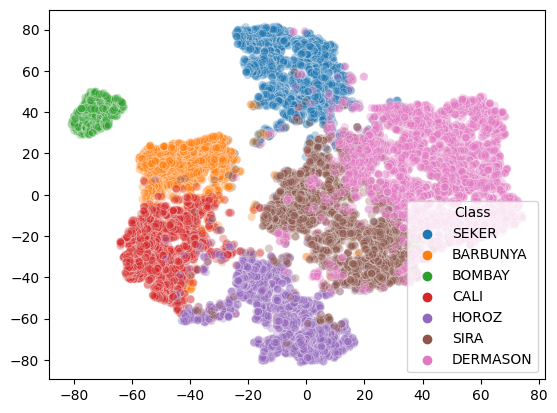

In [10]:

beans_embedded = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50).fit_transform(beans_set.drop(columns='Class'))
sns.scatterplot(
    x=beans_embedded[:,0], y=beans_embedded[:,1],
    hue=beans_set['Class'],
    palette=sns.color_palette(n_colors=np.unique(beans_set['Class']).shape[0]),
    legend="full",
    alpha=0.3
)

<AxesSubplot:>

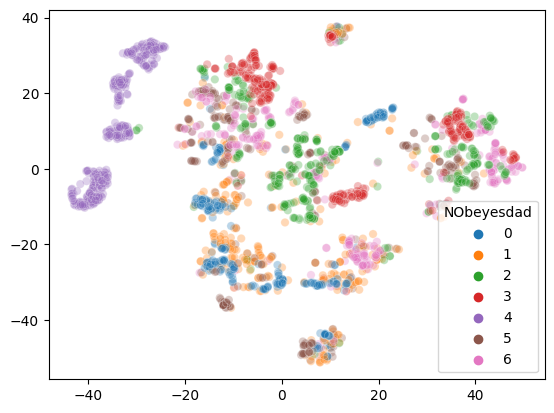

In [1290]:
obesity_embedded = TSNE(n_components=2, n_jobs=-1,learning_rate='auto',
                  init='random', perplexity=50).fit_transform(obesity_set.drop(columns='NObeyesdad'))

sns.scatterplot(
    x=obesity_embedded[:,0], y=obesity_embedded[:,1],
    hue=obesity_set['NObeyesdad'],
    palette=sns.color_palette(n_colors=np.unique(obesity_set['NObeyesdad']).shape[0]),
    legend="full",
    alpha=0.3
)

In [12]:
for i in mice_set.columns:
    if(i!='class'):
        mice_set[i].fillna((mice_set[i].mean()), inplace=True)

<AxesSubplot:>

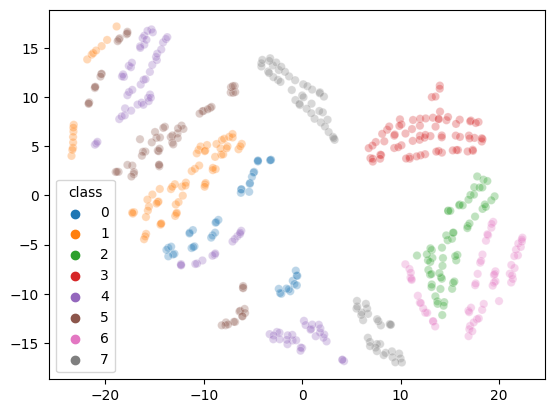

In [1291]:
mice_embedded = TSNE(n_components=2, n_jobs=-1,learning_rate='auto',
                  init='random', perplexity=50).fit_transform(mice_set.drop(columns='class'))

sns.scatterplot(
    x=mice_embedded[:,0], y=mice_embedded[:,1],
    hue=mice_set['class'],
    palette=sns.color_palette(n_colors=np.unique(mice_set['class']).shape[0]),
    legend="full",
    alpha=0.3
)

In [155]:
agglomerative = AgglomerativeClustering(distance_threshold=60,n_clusters=None,linkage='ward')


In [148]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

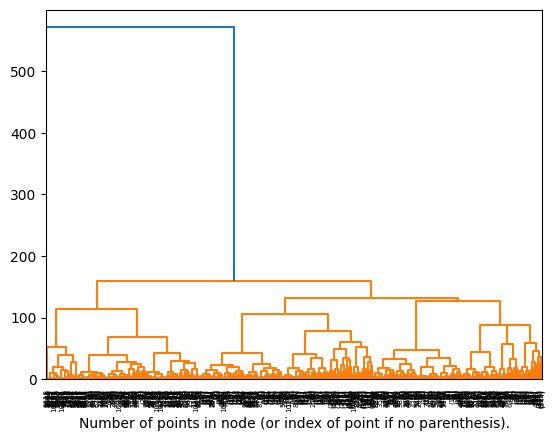

In [156]:
predictions =agglomerative.fit_predict(bible_set.drop(columns=['Class']))
plot_dendrogram(agglomerative,truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [157]:
agglomerative.n_clusters_

12

<AxesSubplot:>

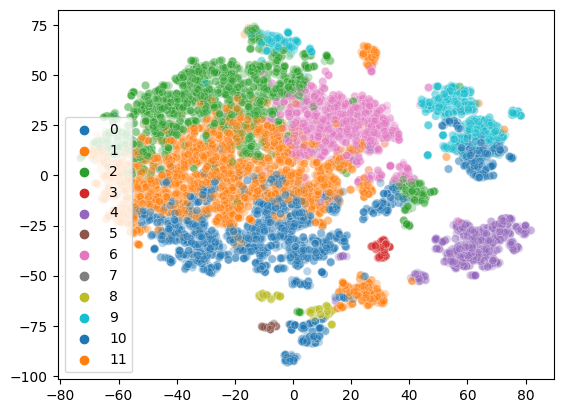

In [158]:
sns.scatterplot(
    x=bible_embedded[:,0], y=bible_embedded[:,1],
    hue=predictions,
    palette=sns.color_palette(n_colors=np.unique(predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [160]:
kmeans = kmeans = KMeans(n_clusters=12, random_state=0,n_init=5,max_iter=300)

<AxesSubplot:>

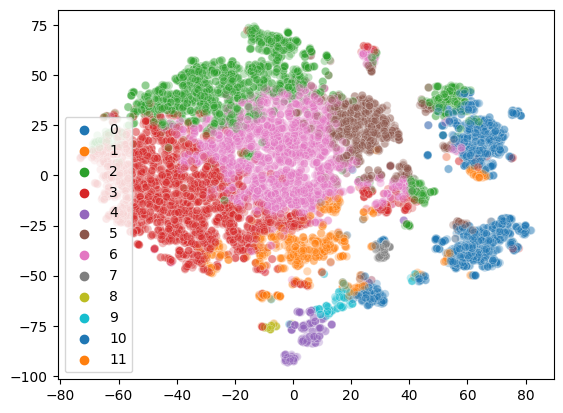

In [161]:
predictions =kmeans.fit_predict(bible_set.drop(columns=['Class']))
# print(predictions)
sns.scatterplot(
    x=bible_embedded[:,0], y=bible_embedded[:,1],
    hue=predictions,
    palette=sns.color_palette(n_colors=np.unique(predictions).shape[0]),
    legend="full",
    alpha=0.3
)

# HDBSCAN

In [1203]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, 
    approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=10,
    metric='euclidean', min_cluster_size=200, 
    min_samples=5, p=None,cluster_selection_epsilon=0,
    cluster_selection_method='leaf')
clusterer.fit(beans_set.drop(columns=['Class']))
beans_predictions = clusterer.labels_


<AxesSubplot:>

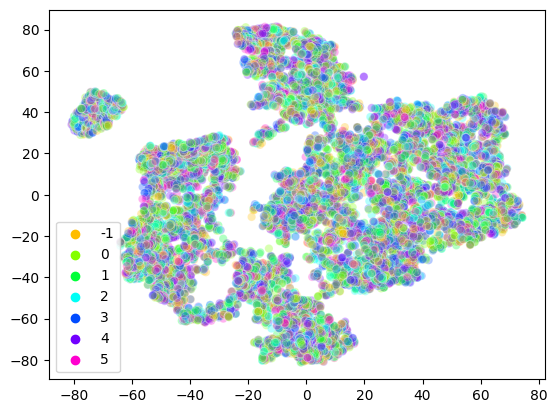

In [1307]:
sns.scatterplot(
    x=beans_embedded[:,0], y=beans_embedded[:,1],
    hue=beans_predictions,
    palette=sns.color_palette("hsv",n_colors=np.unique(beans_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1298]:
clusterer = hdbscan.HDBSCAN(algorithm='best', 
    leaf_size=10,
    metric='euclidean', min_cluster_size=10, 
    min_samples=10,cluster_selection_epsilon=0,
    cluster_selection_method='leaf')
clusterer.fit(mice_set.drop(columns=['class']))
mice_predictions = clusterer.labels_

<AxesSubplot:>

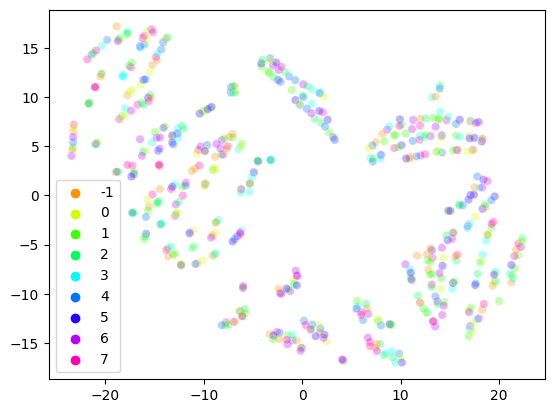

In [1308]:
sns.scatterplot(
    x=mice_embedded[:,0], y=mice_embedded[:,1],
    hue=mice_predictions,
    palette=sns.color_palette("hsv",n_colors=np.unique(mice_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1237]:
clusterer = hdbscan.HDBSCAN(algorithm='best', 
    leaf_size=10,
    metric='euclidean', min_cluster_size=40, 
    min_samples=5,cluster_selection_epsilon=0,
    cluster_selection_method='leaf')
clusterer.fit(obesity_set.drop(columns=['NObeyesdad']))
obesity_predictions = clusterer.labels_

<AxesSubplot:>

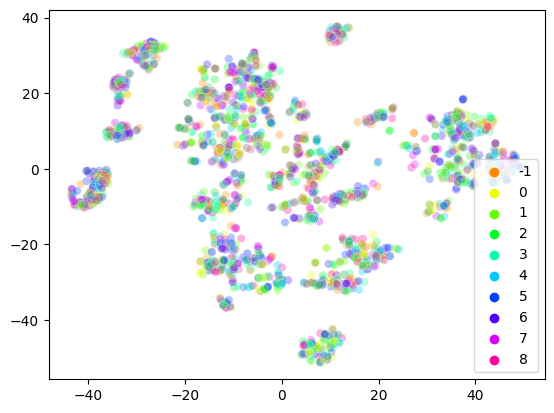

In [1310]:
sns.scatterplot(
    x=obesity_embedded[:,0], y=obesity_embedded[:,1],
    hue=obesity_predictions,
    palette=sns.color_palette("hsv",n_colors=np.unique(obesity_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1300]:
mice_predictions.shape
random_mice_predictions = np.random.randint(-1,8,size=(552,))
random_beans_predictions = np.random.randint(-1,6,size=beans_predictions.shape)
random_obesity_predictions = np.random.randint(-1,9,size=obesity_predictions.shape)


In [1301]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
mice_hdbscan_davies=(davies_bouldin_score(mice_set.drop(columns=['class']),mice_predictions))
mice_hdbscan_rand=(rand_score(mice_set['class'],mice_predictions))
mice_hdbscan_mutual_info=(adjusted_mutual_info_score(mice_set['class'],mice_predictions))
mice_hdbscan_silhouette=(silhouette_score(mice_set.drop(columns=['class']),mice_predictions))

In [1302]:

beans_hdbscan_davies=(davies_bouldin_score(beans_set.drop(columns=['Class']),beans_predictions))
beans_hdbscan_rand=(rand_score(beans_set['Class'],beans_predictions))
beans_hdbscan_mutual_info=(adjusted_mutual_info_score(beans_set['Class'],beans_predictions))
beans_hdbscan_silhouette=(silhouette_score(beans_set.drop(columns=['Class']),beans_predictions))

In [1303]:

obesity_hdbscan_davies=(davies_bouldin_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))
obesity_hdbscan_rand=(rand_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_mutual_info=(adjusted_mutual_info_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_silhouette=(silhouette_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))

In [1304]:
mice_hdbscan_metrics =[mice_hdbscan_davies,mice_hdbscan_rand,mice_hdbscan_mutual_info,mice_hdbscan_silhouette]
beans_hdbscan_metrics =[beans_hdbscan_davies,beans_hdbscan_rand,beans_hdbscan_mutual_info,beans_hdbscan_silhouette]
obesity_hdbscan_metrics =[obesity_hdbscan_davies,obesity_hdbscan_rand,obesity_hdbscan_mutual_info,obesity_hdbscan_silhouette]
score = mice_hdbscan_metrics
score.extend(beans_hdbscan_metrics)
score.extend(obesity_hdbscan_metrics)
score

[22.816679873204336,
 0.7901838554407007,
 0.004097540359195318,
 -0.04660697247236015,
 123.0952249954281,
 0.7337022055733436,
 0.0001687457173963768,
 -0.015441369741379132,
 25.394688242551737,
 0.785518868665824,
 0.0004678273496088438,
 -0.028738661285041628]

In [1305]:
d={'dataset':['mice','mice','mice','mice','beans','beans','beans','beans','obesity','obesity','obesity','obesity']
,'metric':['davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette']
,'score':score}
df =pd.DataFrame(data=d)
df

dataset       metric       score
0      mice       davies   22.816680
1      mice         rand    0.790184
2      mice  mutual info    0.004098
3      mice   silhouette   -0.046607
4     beans       davies  123.095225
5     beans         rand    0.733702
6     beans  mutual info    0.000169
7     beans   silhouette   -0.015441
8   obesity       davies   25.394688
9   obesity         rand    0.785519
10  obesity  mutual info    0.000468
11  obesity   silhouette   -0.028739

c:\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<generator object FacetGrid.facet_data at 0x000002B3BE6DDEE0>

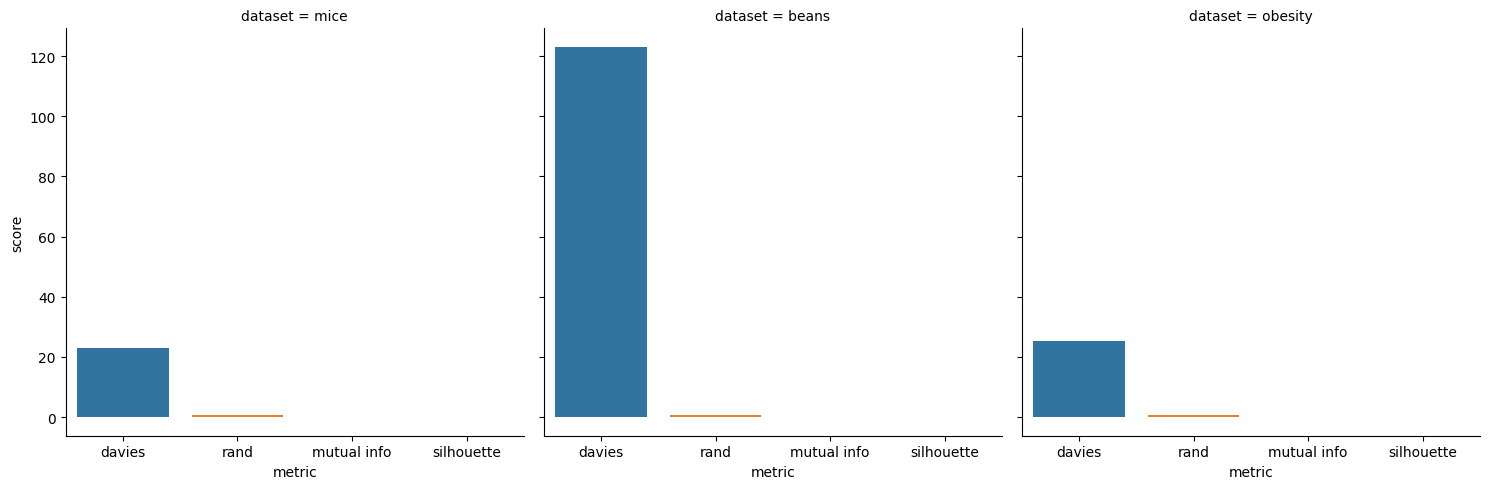

In [1306]:
ax=sns.factorplot("metric",'score',col='dataset',data=df,kind='bar')
ax.facet_data()

# Agglomerative

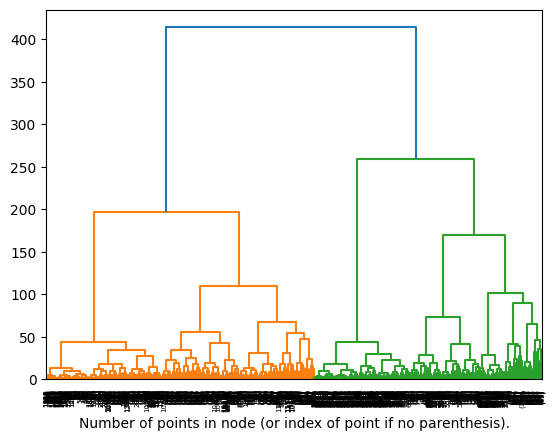

8

In [1462]:
agglomerative = AgglomerativeClustering(distance_threshold=80,
        n_clusters=None,linkage='ward')

beans_predictions =agglomerative.fit_predict(beans_set.drop(columns=['Class']))
plot_dendrogram(agglomerative,truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
agglomerative.n_clusters_

<AxesSubplot:>

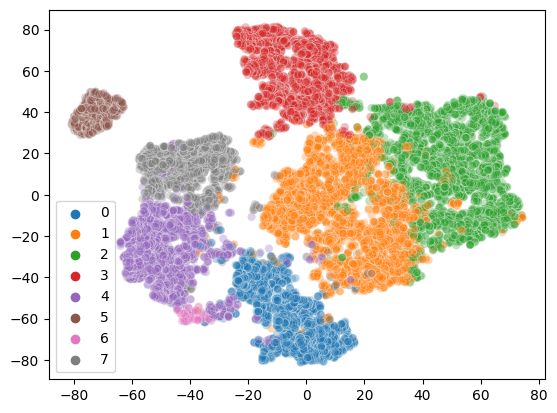

In [1463]:
sns.scatterplot(
    x=beans_embedded[:,0], y=beans_embedded[:,1],
    hue=beans_predictions,
    palette=sns.color_palette(n_colors=np.unique(beans_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

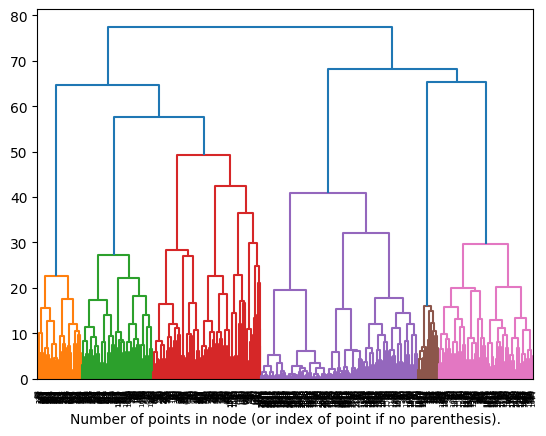

10

In [1465]:
agglomerative = AgglomerativeClustering(distance_threshold=35,
            n_clusters=None,linkage='ward')

obesity_predictions =agglomerative.fit_predict(obesity_set.drop(columns=['NObeyesdad']))
plot_dendrogram(agglomerative,truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
agglomerative.n_clusters_

<AxesSubplot:>

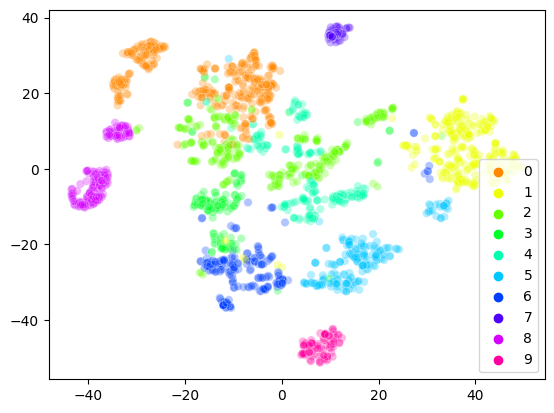

In [1466]:
sns.scatterplot(
    x=obesity_embedded[:,0], y=obesity_embedded[:,1],
    hue=obesity_predictions,
    palette=sns.color_palette('hsv',n_colors=np.unique(obesity_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

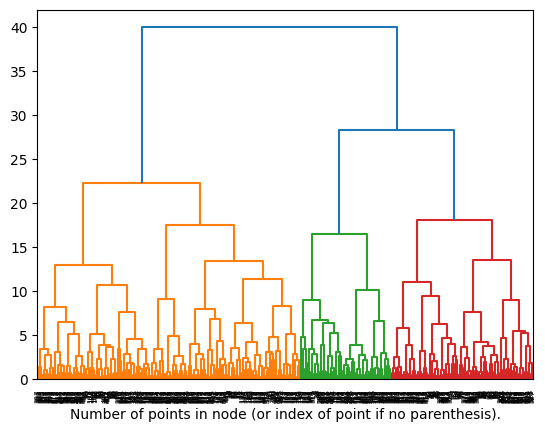

10

In [1468]:
agglomerative = AgglomerativeClustering(distance_threshold=12,n_clusters=None,
                                    linkage='ward')

mice_predictions =agglomerative.fit_predict(mice_set.drop(columns=['class']))
plot_dendrogram(agglomerative,truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
agglomerative.n_clusters_

<AxesSubplot:>

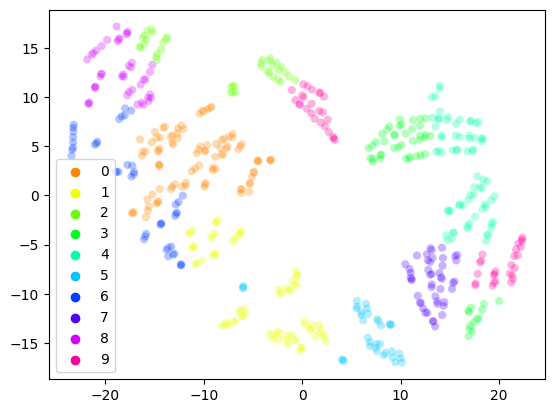

In [1469]:
sns.scatterplot(
    x=mice_embedded[:,0], y=mice_embedded[:,1],
    hue=mice_predictions,
    palette=sns.color_palette('hsv',n_colors=np.unique(mice_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1470]:

beans_hdbscan_davies=(davies_bouldin_score(beans_set.drop(columns=['Class']),beans_predictions))
beans_hdbscan_rand=(rand_score(beans_set['Class'],beans_predictions))
beans_hdbscan_mutual_info=(adjusted_mutual_info_score(beans_set['Class'],beans_predictions))
beans_hdbscan_silhouette=(silhouette_score(beans_set.drop(columns=['Class']),beans_predictions))

In [1471]:

obesity_hdbscan_davies=(davies_bouldin_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))
obesity_hdbscan_rand=(rand_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_mutual_info=(adjusted_mutual_info_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_silhouette=(silhouette_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))

In [1472]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
mice_hdbscan_davies=(davies_bouldin_score(mice_set.drop(columns=['class']),mice_predictions))
mice_hdbscan_rand=(rand_score(mice_set['class'],mice_predictions))
mice_hdbscan_mutual_info=(adjusted_mutual_info_score(mice_set['class'],mice_predictions))
mice_hdbscan_silhouette=(silhouette_score(mice_set.drop(columns=['class']),mice_predictions))

In [1473]:
mice_hdbscan_metrics =[mice_hdbscan_davies,mice_hdbscan_rand,mice_hdbscan_mutual_info,mice_hdbscan_silhouette]
beans_hdbscan_metrics =[beans_hdbscan_davies,beans_hdbscan_rand,beans_hdbscan_mutual_info,beans_hdbscan_silhouette]
obesity_hdbscan_metrics =[obesity_hdbscan_davies,obesity_hdbscan_rand,obesity_hdbscan_mutual_info,obesity_hdbscan_silhouette]
score = mice_hdbscan_metrics
score.extend(beans_hdbscan_metrics)
score.extend(obesity_hdbscan_metrics)


In [1474]:
d={'dataset':['mice','mice','mice','mice','beans','beans','beans','beans','obesity','obesity','obesity','obesity']
,'metric':['davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette']
,'score':score}
df =pd.DataFrame(data=d)
df

dataset       metric     score
0      mice       davies  1.485607
1      mice         rand  0.858078
2      mice  mutual info  0.531924
3      mice   silhouette  0.200087
4     beans       davies  1.250790
5     beans         rand  0.916174
6     beans  mutual info  0.755329
7     beans   silhouette  0.273830
8   obesity       davies  1.780284
9   obesity         rand  0.805950
10  obesity  mutual info  0.295151
11  obesity   silhouette  0.137929

c:\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<generator object FacetGrid.facet_data at 0x000002B3AF846490>

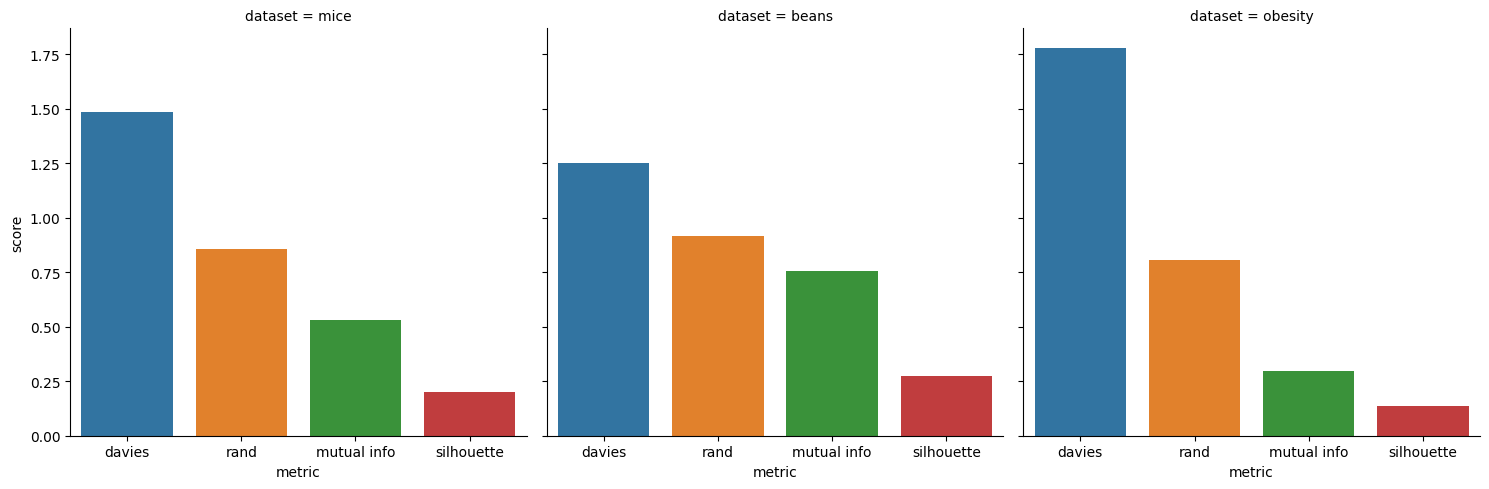

In [1475]:
ax=sns.factorplot("metric",'score',col='dataset',data=df,kind='bar')
ax.facet_data()

# KMeans

<AxesSubplot:>

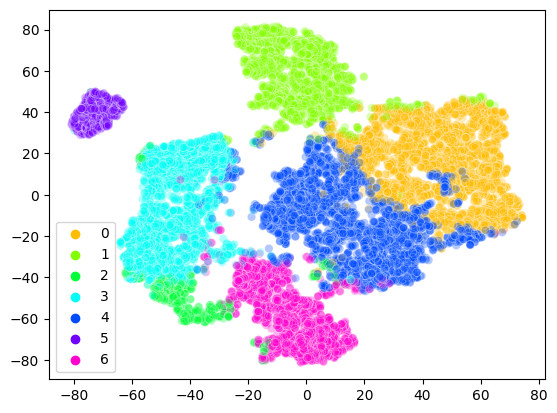

In [1311]:
kmeans = kmeans = KMeans(n_clusters=7,
n_init=10,max_iter=300,init='random')

beans_predictions =kmeans.fit_predict(beans_set.drop(columns=['Class']))
# print(predictions)
sns.scatterplot(
    x=beans_embedded[:,0], y=beans_embedded[:,1],
    hue=beans_predictions,
    palette=sns.color_palette('hsv',n_colors=np.unique(beans_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

<AxesSubplot:>

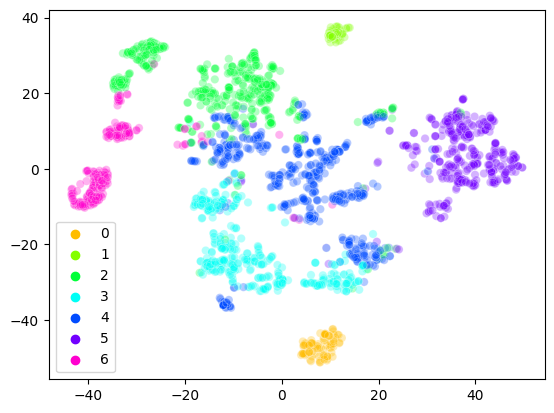

In [1312]:
kmeans = kmeans = KMeans(n_clusters=7, n_init=10,max_iter=300,init='random')
obesity_predictions =kmeans.fit_predict(obesity_set.drop(columns=['NObeyesdad']))
# print(predictions)
sns.scatterplot(
    x=obesity_embedded[:,0], y=obesity_embedded[:,1],
    hue=obesity_predictions,
    palette=sns.color_palette('hsv',n_colors=np.unique(obesity_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

<AxesSubplot:>

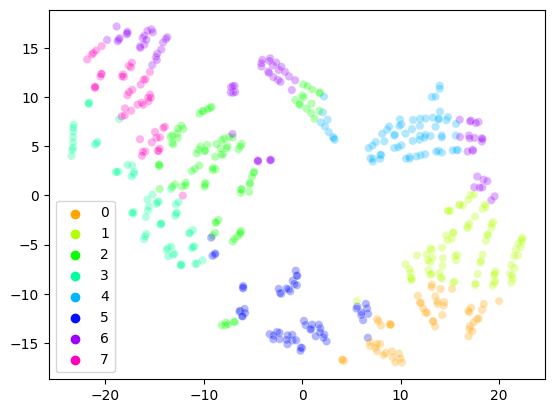

In [1313]:
kmeans = kmeans = KMeans(n_clusters=8,n_init=10,max_iter=300,init='random')
mice_predictions =kmeans.fit_predict(mice_set.drop(columns=['class']))
# print(predictions)
sns.scatterplot(
    x=mice_embedded[:,0], y=mice_embedded[:,1],
    hue=mice_predictions,
    palette=sns.color_palette('hsv',n_colors=np.unique(mice_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1314]:

bible_hdbscan_davies=(davies_bouldin_score(bible_set.drop(columns=['Class']),bible_predictions))
bible_hdbscan_rand=(rand_score(bible_set['Class'],bible_predictions))
bible_hdbscan_mutual_info=(adjusted_mutual_info_score(bible_set['Class'],bible_predictions))
bible_hdbscan_silhouette=(silhouette_score(bible_set.drop(columns=['Class']),bible_predictions))

In [1315]:

beans_hdbscan_davies=(davies_bouldin_score(beans_set.drop(columns=['Class']),beans_predictions))
beans_hdbscan_rand=(rand_score(beans_set['Class'],beans_predictions))
beans_hdbscan_mutual_info=(adjusted_mutual_info_score(beans_set['Class'],beans_predictions))
beans_hdbscan_silhouette=(silhouette_score(beans_set.drop(columns=['Class']),beans_predictions))

In [1316]:

obesity_hdbscan_davies=(davies_bouldin_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))
obesity_hdbscan_rand=(rand_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_mutual_info=(adjusted_mutual_info_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_silhouette=(silhouette_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))

In [1317]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
mice_hdbscan_davies=(davies_bouldin_score(mice_set.drop(columns=['class']),mice_predictions))
mice_hdbscan_rand=(rand_score(mice_set['class'],mice_predictions))
mice_hdbscan_mutual_info=(adjusted_mutual_info_score(mice_set['class'],mice_predictions))
mice_hdbscan_silhouette=(silhouette_score(mice_set.drop(columns=['class']),mice_predictions))

In [1322]:
mice_hdbscan_metrics =[mice_hdbscan_davies,mice_hdbscan_rand,mice_hdbscan_mutual_info,mice_hdbscan_silhouette]
beans_hdbscan_metrics =[beans_hdbscan_davies,beans_hdbscan_rand,beans_hdbscan_mutual_info,beans_hdbscan_silhouette]
obesity_hdbscan_metrics =[obesity_hdbscan_davies,obesity_hdbscan_rand,obesity_hdbscan_mutual_info,obesity_hdbscan_silhouette]
score = mice_hdbscan_metrics
score.extend(beans_hdbscan_metrics)
score.extend(obesity_hdbscan_metrics)



In [1323]:
d={'dataset':['mice','mice','mice','mice','beans','beans','beans','beans','obesity','obesity','obesity','obesity']
,'metric':['davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette']
,'score':score}
df =pd.DataFrame(data=d)
df

dataset       metric     score
0      mice       davies  1.465158
1      mice         rand  0.837246
2      mice  mutual info  0.425545
3      mice   silhouette  0.209131
4     beans       davies  1.099301
5     beans         rand  0.903416
6     beans  mutual info  0.713554
7     beans   silhouette  0.309380
8   obesity       davies  1.842161
9   obesity         rand  0.767386
10  obesity  mutual info  0.275528
11  obesity   silhouette  0.113989

c:\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<generator object FacetGrid.facet_data at 0x000002B3BF54E730>

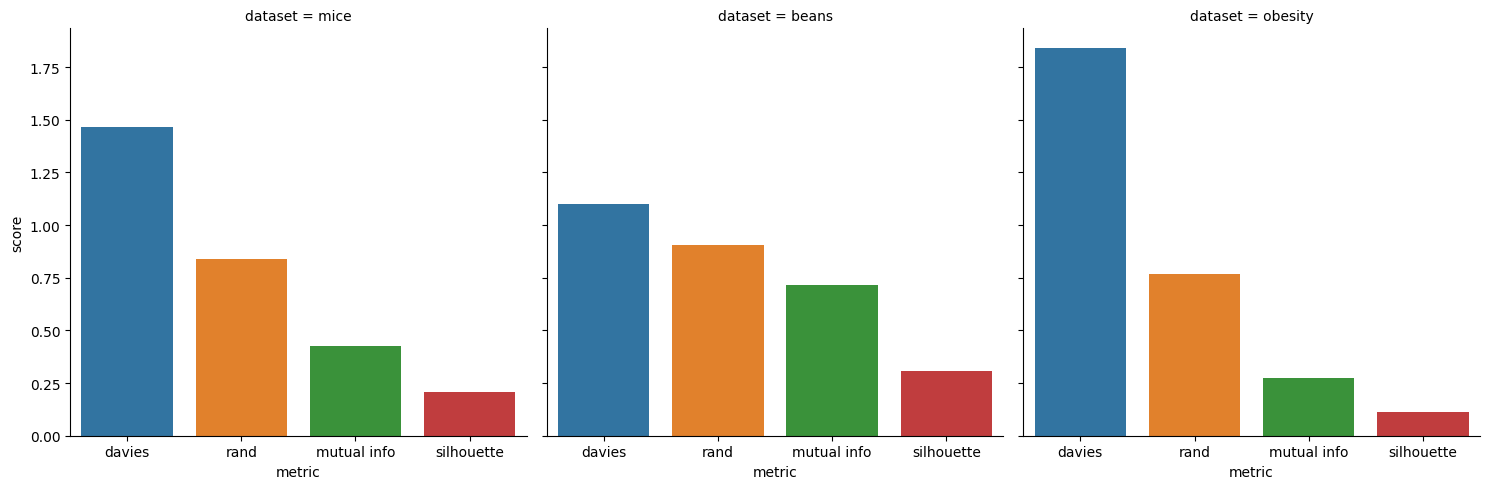

In [1324]:
ax=sns.factorplot("metric",'score',col='dataset',data=df,kind='bar')
ax.facet_data()

# Spectral Clustering

In [1373]:
spectral = SpectralClustering(n_clusters=7,
       assign_labels='discretize',
       n_components=7,affinity='nearest_neighbors',
        n_jobs=-1,n_init=10,n_neighbors=5)


<AxesSubplot:>

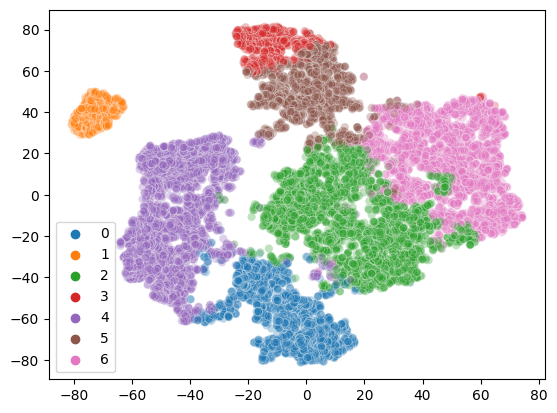

In [1374]:
beans_predictions =spectral.fit_predict(beans_set.drop(columns=['Class']))
# print(predictions)
sns.scatterplot(
    x=beans_embedded[:,0], y=beans_embedded[:,1],
    hue=beans_predictions,
    palette=sns.color_palette(n_colors=np.unique(beans_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1375]:
spectral = SpectralClustering(n_clusters=7,
       assign_labels='discretize',
       n_components=7
       ,affinity='nearest_neighbors',
       n_jobs=-1,n_init=10,n_neighbors=20)


<AxesSubplot:>

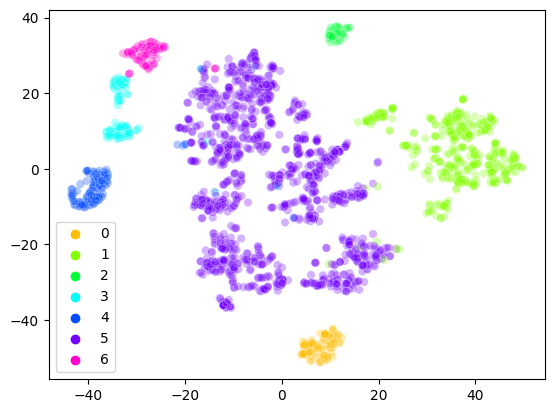

In [1376]:
obesity_predictions =spectral.fit_predict(obesity_set.drop(columns=['NObeyesdad']))
# print(predictions)
sns.scatterplot(
    x=obesity_embedded[:,0], y=obesity_embedded[:,1],
    hue=obesity_predictions,
    palette=sns.color_palette('hsv',n_colors=np.unique(obesity_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1377]:
spectral = SpectralClustering(n_clusters=8,
       assign_labels='discretize',
       n_components=10,affinity='nearest_neighbors',
        n_jobs=-1,n_init=10,n_neighbors=20)


<AxesSubplot:>

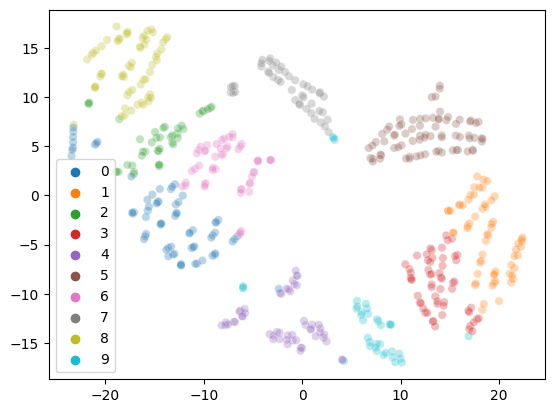

In [1378]:
mice_predictions =spectral.fit_predict(mice_set.drop(columns=['class']))
# print(predictions)
sns.scatterplot(
    x=mice_embedded[:,0], y=mice_embedded[:,1],
    hue=mice_predictions,
    palette=sns.color_palette(n_colors=np.unique(mice_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1379]:

beans_hdbscan_davies=(davies_bouldin_score(beans_set.drop(columns=['Class']),beans_predictions))
beans_hdbscan_rand=(rand_score(beans_set['Class'],beans_predictions))
beans_hdbscan_mutual_info=(adjusted_mutual_info_score(beans_set['Class'],beans_predictions))
beans_hdbscan_silhouette=(silhouette_score(beans_set.drop(columns=['Class']),beans_predictions))

In [1380]:

obesity_hdbscan_davies=(davies_bouldin_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))
obesity_hdbscan_rand=(rand_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_mutual_info=(adjusted_mutual_info_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_silhouette=(silhouette_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))

In [1381]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
mice_hdbscan_davies=(davies_bouldin_score(mice_set.drop(columns=['class']),mice_predictions))
mice_hdbscan_rand=(rand_score(mice_set['class'],mice_predictions))
mice_hdbscan_mutual_info=(adjusted_mutual_info_score(mice_set['class'],mice_predictions))
mice_hdbscan_silhouette=(silhouette_score(mice_set.drop(columns=['class']),mice_predictions))

In [1382]:
mice_hdbscan_metrics =[mice_hdbscan_davies,mice_hdbscan_rand,mice_hdbscan_mutual_info,mice_hdbscan_silhouette]
beans_hdbscan_metrics =[beans_hdbscan_davies,beans_hdbscan_rand,beans_hdbscan_mutual_info,beans_hdbscan_silhouette]
obesity_hdbscan_metrics =[obesity_hdbscan_davies,obesity_hdbscan_rand,obesity_hdbscan_mutual_info,obesity_hdbscan_silhouette]
score = mice_hdbscan_metrics
score.extend(beans_hdbscan_metrics)
score.extend(obesity_hdbscan_metrics)


In [1383]:
d={'dataset':['mice','mice','mice','mice','beans','beans','beans','beans','obesity','obesity','obesity','obesity']
,'metric':['davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette']
,'score':score}
df =pd.DataFrame(data=d)
df

dataset       metric     score
0      mice       davies  1.534958
1      mice         rand  0.895454
2      mice  mutual info  0.653358
3      mice   silhouette  0.190211
4     beans       davies  1.173879
5     beans         rand  0.896278
6     beans  mutual info  0.726231
7     beans   silhouette  0.259572
8   obesity       davies  1.608351
9   obesity         rand  0.617075
10  obesity  mutual info  0.269298
11  obesity   silhouette  0.035116

c:\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<generator object FacetGrid.facet_data at 0x000002B3BF35ECE0>

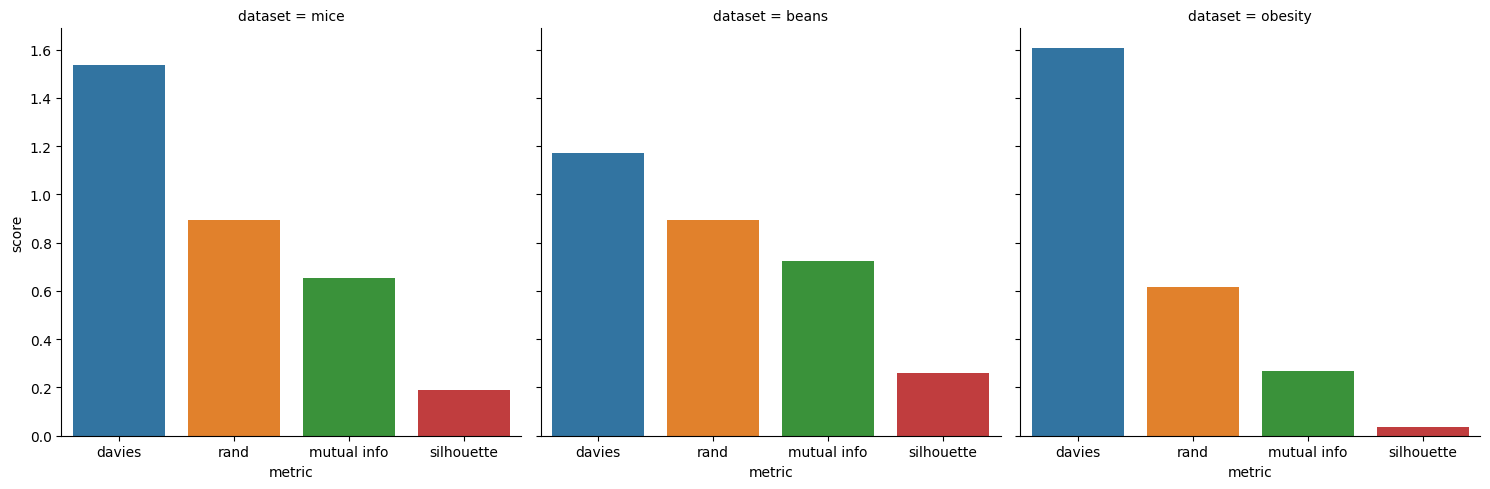

In [1384]:
ax=sns.factorplot("metric",'score',col='dataset',data=df,kind='bar')
ax.facet_data()

# K Medoids

In [1015]:
from sklearn_extra.cluster import KMedoids

In [1390]:
kmedoids = KMedoids(n_clusters=7,metric='cosine',
            init='k-medoids++',max_iter=100)

<AxesSubplot:>

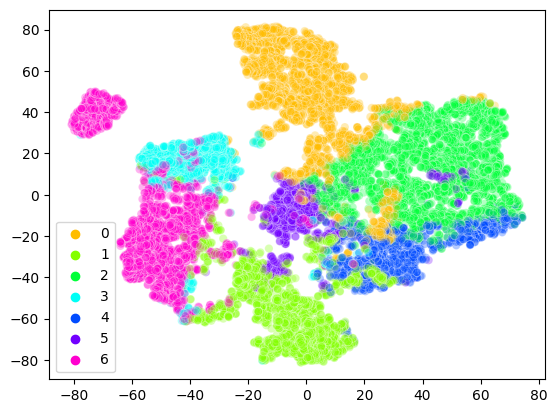

In [1391]:
beans_predictions =kmedoids.fit_predict(beans_set.drop(columns=['Class']))
# print(predictions)
sns.scatterplot(
    x=beans_embedded[:,0], y=beans_embedded[:,1],
    hue=beans_predictions,
    palette=sns.color_palette('hsv',n_colors=np.unique(beans_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1400]:
kmedoids = KMedoids(n_clusters=7,metric='cosine',
        init='k-medoids++',max_iter=200,method='pam')

<AxesSubplot:>

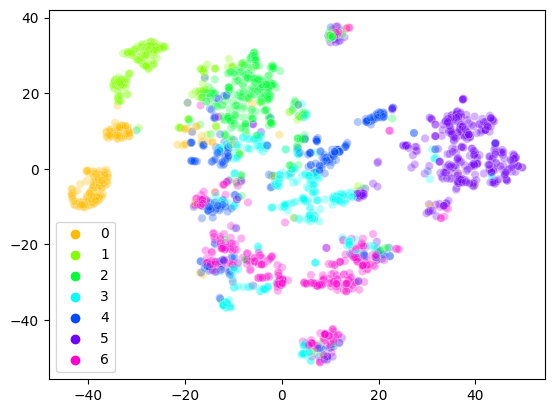

In [1401]:
obesity_predictions =kmedoids.fit_predict(obesity_set.drop(columns=['NObeyesdad']))
# print(predictions)
sns.scatterplot(
    x=obesity_embedded[:,0], y=obesity_embedded[:,1],
    hue=obesity_predictions,
    palette=sns.color_palette('hsv',n_colors=np.unique(obesity_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1410]:
kmedoids = KMedoids(n_clusters=8,metric='cosine',
        init='k-medoids++',max_iter=50)

<AxesSubplot:>

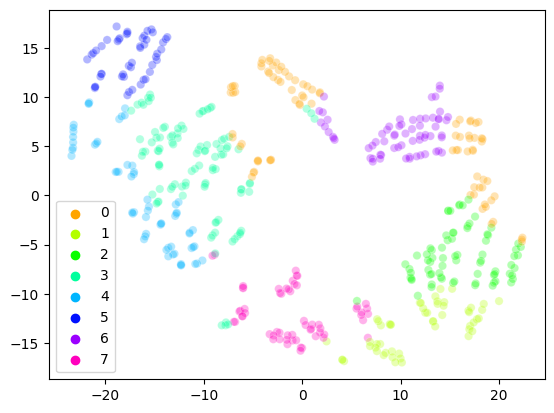

In [1411]:
mice_predictions =kmeans.fit_predict(mice_set.drop(columns=['class']))
# print(predictions)
sns.scatterplot(
    x=mice_embedded[:,0], y=mice_embedded[:,1],
    hue=mice_predictions,
    palette=sns.color_palette('hsv',n_colors=np.unique(mice_predictions).shape[0]),
    legend="full",
    alpha=0.3
)

In [1392]:

beans_hdbscan_davies=(davies_bouldin_score(beans_set.drop(columns=['Class']),beans_predictions))
beans_hdbscan_rand=(rand_score(beans_set['Class'],beans_predictions))
beans_hdbscan_mutual_info=(adjusted_mutual_info_score(beans_set['Class'],beans_predictions))
beans_hdbscan_silhouette=(silhouette_score(beans_set.drop(columns=['Class']),beans_predictions))

In [1402]:

obesity_hdbscan_davies=(davies_bouldin_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))
obesity_hdbscan_rand=(rand_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_mutual_info=(adjusted_mutual_info_score(obesity_set['NObeyesdad'],obesity_predictions))
obesity_hdbscan_silhouette=(silhouette_score(obesity_set.drop(columns=['NObeyesdad']),obesity_predictions))

In [1412]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
mice_hdbscan_davies=(davies_bouldin_score(mice_set.drop(columns=['class']),mice_predictions))
mice_hdbscan_rand=(rand_score(mice_set['class'],mice_predictions))
mice_hdbscan_mutual_info=(adjusted_mutual_info_score(mice_set['class'],mice_predictions))
mice_hdbscan_silhouette=(silhouette_score(mice_set.drop(columns=['class']),mice_predictions))

In [1413]:
mice_hdbscan_metrics =[mice_hdbscan_davies,mice_hdbscan_rand,mice_hdbscan_mutual_info,mice_hdbscan_silhouette]
beans_hdbscan_metrics =[beans_hdbscan_davies,beans_hdbscan_rand,beans_hdbscan_mutual_info,beans_hdbscan_silhouette]
obesity_hdbscan_metrics =[obesity_hdbscan_davies,obesity_hdbscan_rand,obesity_hdbscan_mutual_info,obesity_hdbscan_silhouette]
score = mice_hdbscan_metrics
score.extend(beans_hdbscan_metrics)
score.extend(obesity_hdbscan_metrics)


In [1414]:
d={'dataset':['mice','mice','mice','mice','beans','beans','beans','beans','obesity','obesity','obesity','obesity']
,'metric':['davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette','davies','rand','mutual info','silhouette']
,'score':score}
df =pd.DataFrame(data=d)
df

dataset       metric     score
0      mice       davies  1.400945
1      mice         rand  0.834293
2      mice  mutual info  0.425784
3      mice   silhouette  0.219906
4     beans       davies  1.428593
5     beans         rand  0.869854
6     beans  mutual info  0.609483
7     beans   silhouette  0.186624
8   obesity       davies  2.113032
9   obesity         rand  0.797098
10  obesity  mutual info  0.298408
11  obesity   silhouette  0.092637

c:\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<generator object FacetGrid.facet_data at 0x000002B386591380>

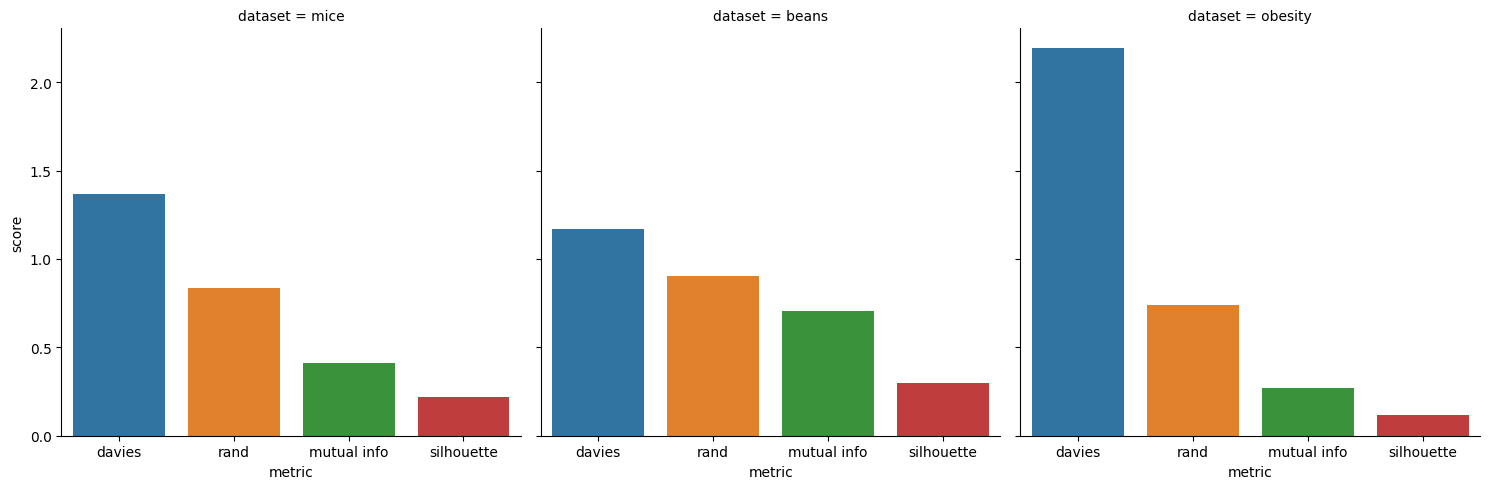

In [1350]:
ax=sns.factorplot("metric",'score',col='dataset',data=df,kind='bar')
ax.facet_data()